In [9]:
import pyscan as ps
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

In [10]:
def generate_multiD_data(expt):
    """
    Generates fake data proportinal to loopX.i
    x1 - 0D data (point)
    x2 - 1D data (line/array)
    x3 - 2D data (2D array)
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    v = runinfo.loop0.i + np.random.randn()
    
    d.x1 = v
    d.x2 = [v for i in range(5)]
    d.x3 = [[v for i in range(5)] for j in range(5)]
    
    return d

In [11]:
# Setup as usual
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()


In [12]:
# 0D data repeat
runinfo = ps.RunInfo()
runinfo.loop0 = ps.AverageScan(10, dt=0.01)

runinfo.measure_function = generate_multiD_data

# This is the only important difference
expt = ps.Sweep(runinfo, devices)
expt.run()

sleep(1)
expt.x1

Scan 1/1 Complete


4.904316298553256

In [13]:
# 1D repeat
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)
runinfo.loop1 = ps.AverageScan(10, dt=0.01)

runinfo.measure_function = generate_multiD_data

# This is the only important difference
expt = ps.Sweep(runinfo, devices)
expt.start_thread()


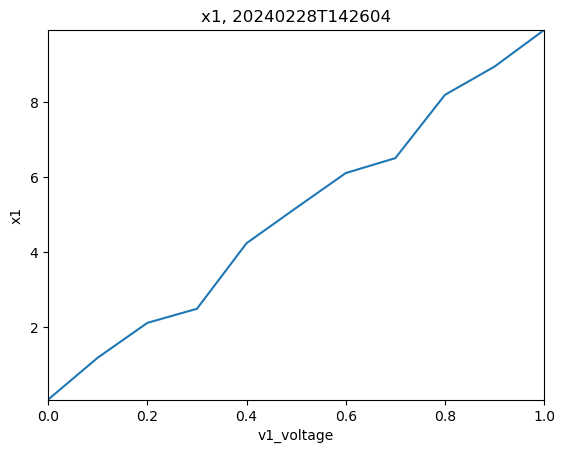

In [14]:
ps.live_plot1D(expt)

In [15]:
# 2D data repeat
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 1)}, prop='voltage', dt=0.01)
runinfo.loop2 = ps.AverageScan(10, dt=0.1)

runinfo.measure_function = generate_multiD_data

# This is the only important difference
expt = ps.Sweep(runinfo, devices)
expt.start_thread()


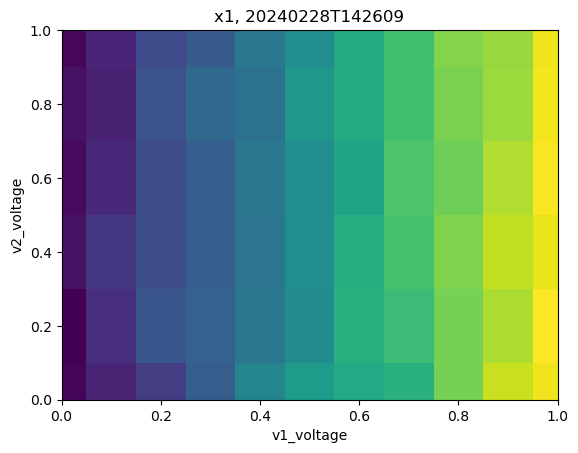

In [16]:
ps.live_plot2D(expt)